# **1. Import libraries** <a class="anchor"></a>


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


%matplotlib inline
warnings.filterwarnings('ignore')

# **2. Import dataset** <a class="anchor" id="6"></a>

In [3]:
data = 'provinsi_maluku.xlsx'

df_2019 = pd.read_excel(data, sheet_name="2019")
df_2020 = pd.read_excel(data, sheet_name="2020")
df_2021 = pd.read_excel(data, sheet_name="2021")
df_2022 = pd.read_excel(data, sheet_name="2022")
df_2023 = pd.read_excel(data, sheet_name="2023")

df_2019.head()

,Kabupaten/Kota,Persentase Penduduk Miskin,APK SMA/SMK,Persentase Pengangguran Terbuka,Penduduk dengan Keluhan Kesehatan,IPM
0,Maluku Tenggara Barat,27.25,112.79,4.85,16.75,62.86
1,Maluku Tenggara,22.75,114.61,2.58,18.34,65.85
2,Maluku Tengah,20.04,106.32,7.76,16.08,71.25
3,Buru,16.74,108.91,2.81,23.69,68.91
4,Kepulauan Aru,26.73,111.61,4.05,16.98,63.64


In [4]:
def kelompokkan_ipm(ipm):
    if ipm < 70:
        return '0'
    else:
        return '1'

df_maluku = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
df_maluku['IPM'] = df_maluku['IPM'].apply(kelompokkan_ipm)
df_maluku

,Kabupaten/Kota,Persentase Penduduk Miskin,APK SMA/SMK,Persentase Pengangguran Terbuka,Penduduk dengan Keluhan Kesehatan,IPM
0,Maluku Tenggara Barat,27.25,112.79,4.85,16.75,0
1,Maluku Tenggara,22.75,114.61,2.58,18.34,0
2,Maluku Tengah,20.04,106.32,7.76,16.08,1
3,Buru,16.74,108.91,2.81,23.69,0
4,Kepulauan Aru,26.73,111.61,4.05,16.98,0
...,...,...,...,...,...,...
50,Seram Bagian Timur,21.08,103.92,3.31,23.13,0
51,Maluku Barat Daya,28.78,102.93,2.43,19.08,0
52,Buru Selatan,15.28,105.38,0.97,13.42,0
53,Ambon,5.25,108.04,11.65,22.67,1


# **2. Exploratory data analysis** <a class="anchor" id="2"></a>

Disini kita perlu melakukan eksplorasi untuk melihat informasi yang didapat dari data

In [5]:
# view dimensions of dataset

df_maluku.shape

(55, 6)

In [6]:
col_names = df_maluku.columns
col_names

Index(['Kabupaten/Kota', 'Persentase Penduduk Miskin', 'APK SMA/SMK',
       'Persentase Pengangguran Terbuka', 'Penduduk dengan Keluhan Kesehatan',
       'IPM'],
      dtype='object')

Disini kita bisa lihat bahwa di dalam data terdapat 55 baris dan 6 kolom dalam data set.

In [7]:
# view summary of dataset
df_maluku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Kabupaten/Kota                     55 non-null     object 
 1   Persentase Penduduk Miskin         55 non-null     float64
 2   APK SMA/SMK                        55 non-null     float64
 3   Persentase Pengangguran Terbuka    55 non-null     float64
 4   Penduduk dengan Keluhan Kesehatan  55 non-null     float64
 5   IPM                                55 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


In [8]:
# check missing values in categorical variables

df_maluku.isnull().sum()

Kabupaten/Kota                       0
Persentase Penduduk Miskin           0
APK SMA/SMK                          0
Persentase Pengangguran Terbuka      0
Penduduk dengan Keluhan Kesehatan    0
IPM                                  0
dtype: int64

In [9]:
cardinality = df_maluku.nunique()
cardinality

Kabupaten/Kota                       11
Persentase Penduduk Miskin           55
APK SMA/SMK                          54
Persentase Pengangguran Terbuka      54
Penduduk dengan Keluhan Kesehatan    53
IPM                                   2
dtype: int64

Text(0, 0.5, 'Penduduk dengan Keluhan Kesehatan')

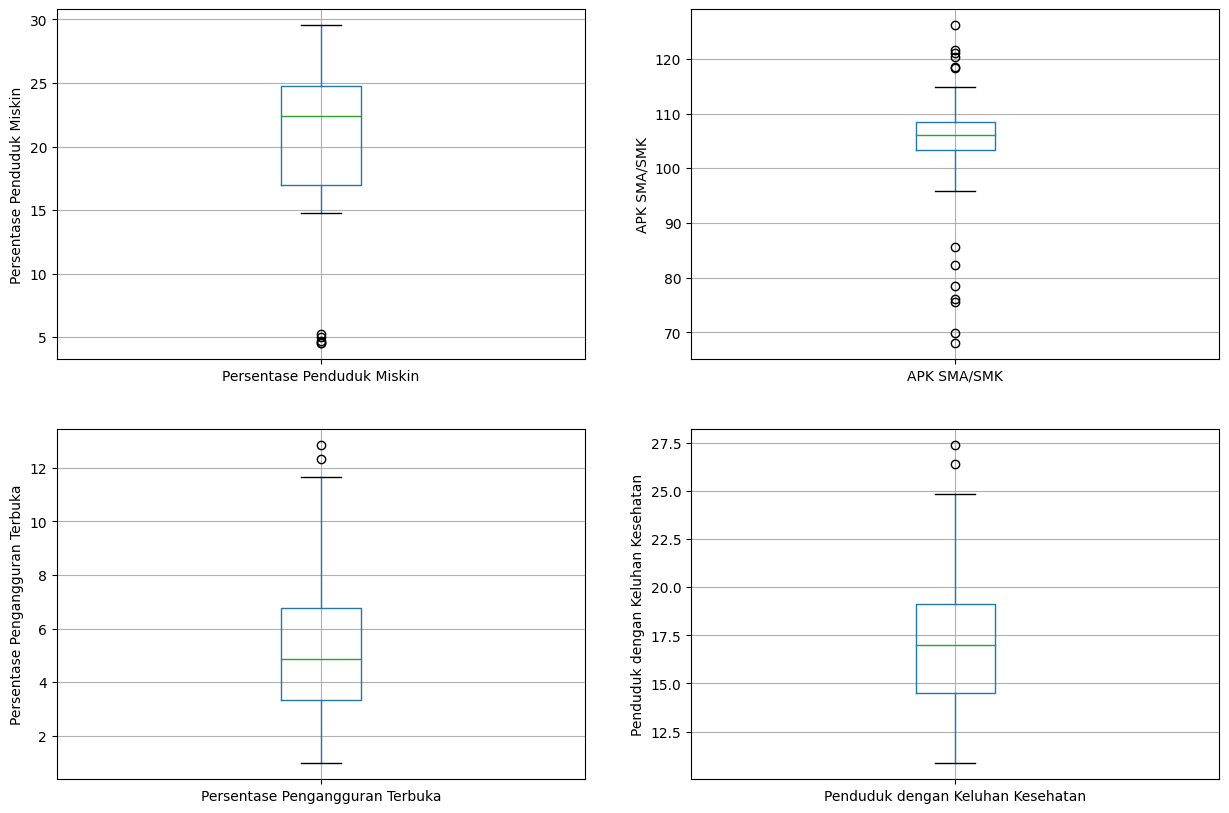

In [10]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_maluku.boxplot(column='Persentase Penduduk Miskin')
fig.set_title('')
fig.set_ylabel('Persentase Penduduk Miskin')

plt.subplot(2, 2, 2)
fig = df_maluku.boxplot(column='APK SMA/SMK')
fig.set_title('')
fig.set_ylabel('APK SMA/SMK')

plt.subplot(2, 2, 3)
fig = df_maluku.boxplot(column='Persentase Pengangguran Terbuka')
fig.set_title('')
fig.set_ylabel('Persentase Pengangguran Terbuka')

plt.subplot(2, 2, 4)
fig = df_maluku.boxplot(column='Penduduk dengan Keluhan Kesehatan')
fig.set_title('')
fig.set_ylabel('Penduduk dengan Keluhan Kesehatan')

Plot di atas menunjukkan letak outlier untuk setiap variabel.

# **Check of Distribution Data** <a class="anchor" id="8"></a>
Lalu, disini kita akan mengecek histogram untuk melihat distribusi data untuk setiap kota sepanjang tahun di provinsi Malukuk.

Text(0, 0.5, 'Penduduk dengan Keluhan Kesehatan')

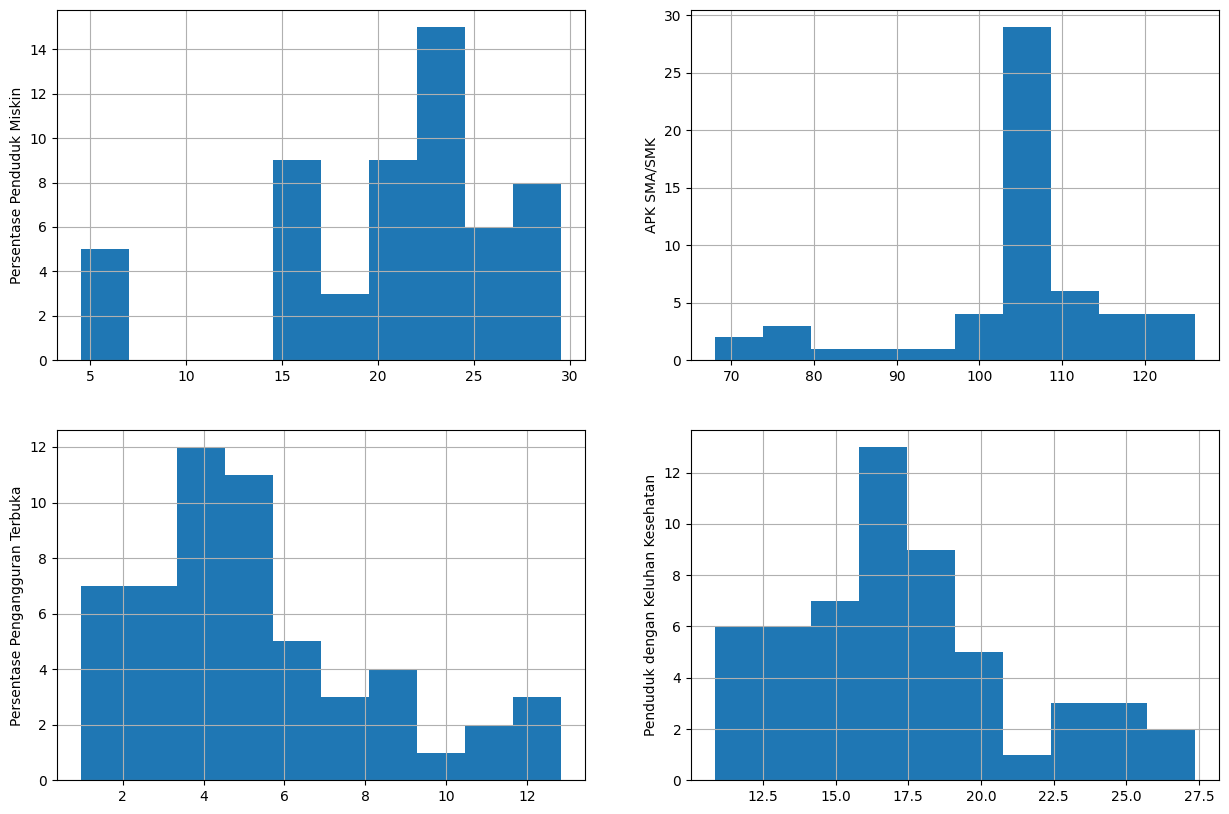

In [11]:
# plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df_maluku['Persentase Penduduk Miskin'].hist()
plt.title('')
plt.ylabel('Persentase Penduduk Miskin')

plt.subplot(2, 2, 2)
fig = df_maluku['APK SMA/SMK'].hist()
plt.title('')
plt.ylabel('APK SMA/SMK')

plt.subplot(2, 2, 3)
fig = df_maluku['Persentase Pengangguran Terbuka'].hist()
plt.title('')
plt.ylabel('Persentase Pengangguran Terbuka')

plt.subplot(2, 2, 4)
fig = df_maluku['Penduduk dengan Keluhan Kesehatan'].hist()
plt.title('')
plt.ylabel('Penduduk dengan Keluhan Kesehatan')

# **Penetapan Feature vector dan target variabel** <a class="anchor" id="8"></a>

In [12]:
X = df_maluku.drop(['Kabupaten/Kota', 'IPM'], axis=1)
y = df_maluku['IPM']
y = y.astype(int)

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Standarisasi** <a class="anchor" id="8"></a>

In [13]:
# Scale data (mean=0, std=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model training using Pytorch** <a class="anchor" id="12"></a>

In [14]:
# Convert the training and testing data to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, n_feats):
        super().__init__()
        
        # Define layers
        self.lin = nn.Linear(n_feats,1)
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        return self.sig(self.lin(x))

model = LogisticRegression(n_feats = X.shape[1])

y_train shape: torch.Size([44, 1])
y_test shape: torch.Size([11, 1])


In [40]:
# Get the weights and bias
weights = model.lin.weight.data.numpy()
bias = model.lin.bias.data.numpy()

# Print the equation
print("The logistic regression equation is:")
print(f' + {bias[0]}')
for i, weight in enumerate(weights[0]):
    print(f' + ({weight} * x{i+1})')

The logistic regression equation is:
 + -0.918796956539154
 + (-1.080904245376587 * x1)
 + (0.4431614875793457 * x2)
 + (1.2099543809890747 * x3)
 + (-0.21897439658641815 * x4)


Definisi neural network menggunakan pytorch dengan satu lapisan linear dengan model sederhana diikuti oleh fungsi aktivasi sigmoid. Dengan presentase sebagai return output layer. 

In [41]:
# Get the weights
weights = model.lin.weight.data.numpy()

# Calculate and print the odds ratios
odds_ratios = np.exp(weights)
for i, odds_ratio in enumerate(odds_ratios[0]):
    print(f'Odds ratio for x{i+1}: {odds_ratio}')

Odds ratio for x1: 0.339288592338562
Odds ratio for x2: 1.5576238632202148
Odds ratio for x3: 3.3533318042755127
Odds ratio for x4: 0.8033422827720642


In [15]:
# Set the seed for lock initialization
torch.manual_seed(42)

# Binary cross entropy loss
loss = nn.BCELoss()

# Adam optimiser
optimiser = torch.optim.Adam(params = model.parameters(), lr=0.01)
n_iters = 190

# Loop
for epoch in range(n_iters):
    # Forward pass
    y_preds = model(X_train)
    L = loss(y_preds, y_train)
    
    # Backprop
    L.backward()
    
    # Update parameters
    optimiser.step()
    
    # Zero gradients
    optimiser.zero_grad()
    
    # Print loss
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, loss {L.item():.3f}')

Epoch 0, loss 0.822
Epoch 20, loss 0.648
Epoch 40, loss 0.531
Epoch 60, loss 0.449
Epoch 80, loss 0.389
Epoch 100, loss 0.345
Epoch 120, loss 0.311
Epoch 140, loss 0.284
Epoch 160, loss 0.262
Epoch 180, loss 0.244


Melakukan inisiasi model neural network dengan mendefinisikan BCELoss dan optimizer Adam dengan parameter spesifik linear. Iterasi hingga 190 untuk menghasilkan akurasi yang diinginkan

In [16]:
with torch.no_grad():
    acc = model(X_train).round().eq(y_train).sum() / len(y_train.numpy())
    print(f'Accuracy on train set: {100*acc.item():.2f} %')

Accuracy on train set: 90.91 %


In [17]:
with torch.no_grad():
    acc = model(X_test).round().eq(y_test).sum() / len(y_test.numpy())
    print(f'Accuracy on test set: {100*acc.item():.2f} %')

Accuracy on test set: 90.91 %


# **ROC-AUC Curve** <a class="anchor" id="8"></a>


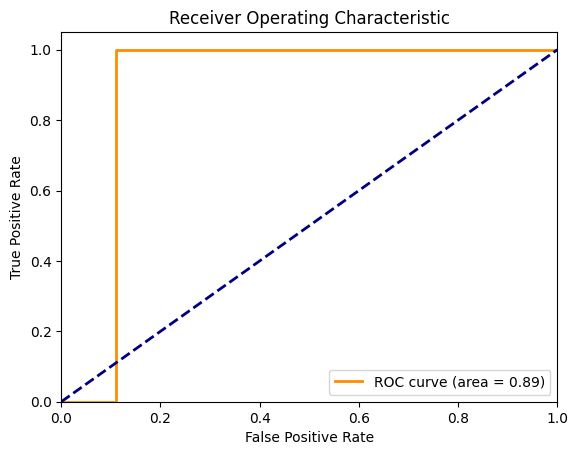

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predictions on the test set
with torch.no_grad():
    y_preds = model(X_test).numpy()

# Calculate fpr, tpr, thresholds and AUC
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion matrix adalah pengukuran performa untuk machine learning dari sebuah algoritma klasifikasi. Sebuah confusion matrix akan memberikan gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Ini memberikan ringkasan dari prediksi yang benar dan yang salah yang dibagi berdasarkan setiap kategori. Tabel confusion matrix terdiri dari 4 ringkasan yang direpresentasikan dalam bentuk tabular.

Keempat hasil ini dijelaskan di bawah ini:

**True Positives (TP)** – True Positives terjadi saat kita memprediksi sebuah observasi termasuk dalam sebuah kelas tertentu dan observasi tersebut memang termasuk dalam kelas tersebut.

**True Negatives (TN)** – True Negatives terjadi saat kita memprediksi sebuah observasi tidak termasuk dalam sebuah kelas tertentu dan observasi tersebut memang tidak termasuk dalam kelas tersebut.

**False Positives (FP)** – False Positives terjadi saat kita memprediksi sebuah observasi termasuk dalam sebuah kelas tertentu tetapi observasi tersebut sebenarnya tidak termasuk dalam kelas tersebut. Jenis kesalahan ini disebut **Kesalahan Tipe I.**

**False Negatives (FN)** – False Negatives terjadi saat kita memprediksi sebuah observasi tidak termasuk dalam sebuah kelas tertentu tetapi observasi tersebut sebenarnya termasuk dalam kelas tersebut. Ini adalah kesalahan yang sangat serius dan disebut **Kesalahan Tipe II.**

In [19]:
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
with torch.no_grad():
    y_train_pred = model(X_train).round()
    y_test_pred = model(X_test).round()

# Convert tensors to numpy arrays for use with confusion_matrix
# y_train_pred = y_train_pred.numpy()
y_test_pred = y_test_pred.numpy()

# y_train_true = y_train.numpy()
y_test_true = y_test.numpy()

# compute the confusion matrix
# confusion_mtx_train = confusion_matrix(y_train_true, y_train_pred) 
confusion_mtx_test = confusion_matrix(y_test_true, y_test_pred) 

# print the confusion matrix
# print("Confusion matrix for training data:")
# print(confusion_mtx_train)

print("\nConfusion matrix for testing data:")
print(confusion_mtx_test)

print('\nTrue Positives(TP) = ', confusion_mtx_test[0,0])

print('\nTrue Negatives(TN) = ', confusion_mtx_test[1,1])

print('\nFalse Positives(FP) = ', confusion_mtx_test[0,1])

print('\nFalse Negatives(FN) = ', confusion_mtx_test[1,0])


Confusion matrix for testing data:
[[8 1]
 [0 2]]

True Positives(TP) =  8

True Negatives(TN) =  2

False Positives(FP) =  1

False Negatives(FN) =  0


<AxesSubplot: >

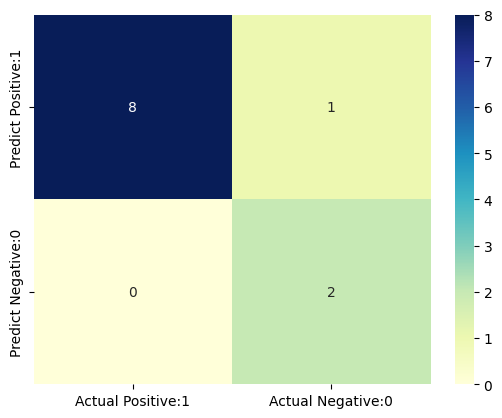

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=confusion_mtx_test, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Classification metrices** <a class="anchor" id="16"></a>


Selain TP TN FP FN, pengukuran dalam model machine learning juga ada yang namanya classification report. Dalam evaluasi ini di dalam model menghasilkan precision, recall, f1-score, dan support. Informasi ini dipakai untuk mengomparasi model.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.67      1.00      0.80         2

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11



<font face="Times New Roman">

# **Classification accuracy** <a class="anchor" id="8"></a>

</font>


In [23]:
TP = confusion_mtx_test[0,0]
TN = confusion_mtx_test[1,1]
FP = confusion_mtx_test[0,1]
FN = confusion_mtx_test[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9091


# **Classification error** <a class="anchor" id="8"></a>

In [24]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0909


In [25]:
# Prediksi from data testing
with torch.no_grad():
    y_test_pred = model(X_test).round().numpy()

# Save prediction
test_results = pd.DataFrame({'Actual': y_test.numpy().flatten(), 'Predicted': y_test_pred.flatten()})
print(test_results)

    Actual  Predicted
0      0.0        0.0
1      0.0        0.0
2      0.0        0.0
3      0.0        0.0
4      0.0        0.0
5      1.0        1.0
6      0.0        0.0
7      0.0        1.0
8      1.0        1.0
9      0.0        0.0
10     0.0        0.0


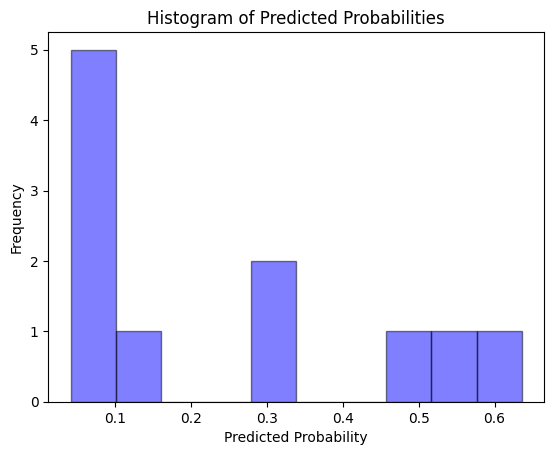

In [46]:
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
with torch.no_grad():
    y_probs = model(X_test)

# Convert tensor to numpy array
y_probs_np = y_probs.numpy()

# Plot histogram
plt.hist(y_probs_np, bins=10, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()